In [3]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import netCDF4
import cftime
import seaborn
import cmocean

import glob
import pandas

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

# import cam 400 data

In [4]:
cont_fileroot = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30days.cam0400.clm0400.ens_10members/ens_mean_cesm_files/'
cont_filename = 'B_1850_CAM5.30days.cam0400.clm0400.ens.cam.h0.0011-03-20-0000_0011-04-20-0000_ens_mean.nc'
cont_cam_ds = xarray.open_dataset(cont_fileroot+cont_filename, decode_times=False)

# Calculate latitude information

In [11]:
lat_lo = -30.
lat_hi = 30.
lon_lo = 270.
lon_hi = 330.

In [12]:
lat = cont_cam_mfds['lat'].values
lon = cont_cam_mfds['lon'].values

lat_indices = (lat>=lat_lo)&(lat<=lat_hi)
lon_indices = (lon>=lon_lo)&(lon<=lon_hi)

lat_subset = lat[lat_indices]
lon_subset = lon[lon_indices]

# get land fraction info

In [33]:
LANDFRAC = cont_cam_ds['LANDFRAC'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values[0,:,:]

# get 400 fields for cam

In [13]:
TREFHT_400 = cont_cam_ds['TREFHT'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PBLH_400 = cont_cam_ds['PBLH'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
LHFLX_400 = cont_cam_ds['LHFLX'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECC_400 = cont_cam_ds['PRECC'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECL_400 = cont_cam_ds['PRECL'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
TMQ_400 = cont_cam_ds['TMQ'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values

# import clm400 data

In [4]:
cont_fileroot = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30days.cam0400.clm0400.ens_10members/ens_mean_cesm_files/'
cont_filename = 'B_1850_CAM5.30days.cam0400.clm0400.ens.cam.h0.0011-03-20-0000_0011-04-20-0000_ens_mean.nc'
cont_cam_ds = xarray.open_dataset(cont_fileroot+cont_filename, decode_times=False)

In [7]:
cont_cam_ds = xarray.open_dataset(cont_fileroot+cont_filename, decode_times=False)

# get 400 fields for clm

In [14]:
cont_fileroot = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30days.cam0400.clm0400.ens_10members/ens_mean_cesm_files/'
cont_filename = 'B_1850_CAM5.30days.cam0400.clm0400.ens.clm2.h0.0011-03-20-0000_0011-04-20-0000_ens_mean.nc'
cont_clm_ds = xarray.open_dataset(cont_fileroot+cont_filename, decode_times=False)

In [54]:
QVEGT_400 = cont_clm_ds['QVEGT'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values

# import cam 1000 data

In [18]:
phys_fileroot = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30days.cam0400.clm1000.ens_10members/ens_mean_cesm_files/'
phys_filename = 'B_1850_CAM5.30days.cam0400.clm1000.ens.cam.h0.0011-03-20-0000_0011-04-20-0000_ens_mean.nc'
phys_cam_ds = xarray.open_dataset(phys_fileroot+phys_filename, decode_times=False)

# get 1000 fields for cam

In [19]:
TREFHT_1000 = phys_cam_ds['TREFHT'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PBLH_1000 = phys_cam_ds['PBLH'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
LHFLX_1000 = phys_cam_ds['LHFLX'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECC_1000 = phys_cam_ds['PRECC'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECL_1000 = phys_cam_ds['PRECL'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
TMQ_1000 = phys_cam_ds['TMQ'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values

# import clm 1000 data

In [20]:
phys_fileroot = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30days.cam0400.clm1000.ens_10members/ens_mean_cesm_files/'
phys_filename = 'B_1850_CAM5.30days.cam0400.clm1000.ens.clm2.h0.0011-03-20-0000_0011-04-20-0000_ens_mean.nc'
phys_clm_ds = xarray.open_dataset(phys_fileroot+phys_filename, decode_times=False)

In [55]:
QVEGT_1000 = phys_clm_ds['QVEGT'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values

# Convert time information

In [22]:
time_400 = cont_cam_mfds['time']
time_converted = netCDF4.num2date(time_400.values, time_400.units, time_400.calendar)

In [23]:
time_manual = []
for t_idx in range(time_converted.size):
    year=time_converted[t_idx].year
    month=time_converted[t_idx].month
    day=time_converted[t_idx].day
    hour=time_converted[t_idx].hour
    minute=time_converted[t_idx].minute
    hour_round = round(hour+minute/60)
    time_manual.append(cftime.DatetimeNoLeap(year,month,day,hour_round))

# specify timing

In [74]:
#time_manual.__len__() = 745

In [75]:
skip_time = 24
end_time = 745

# TMQ diffs

In [76]:
TMQ_diffs = TMQ_1000-TMQ_400
TMQ_diffs_timemean = numpy.mean(TMQ_diffs[skip_time:end_time,:,:], axis=0)
TMQ_400_timemean = numpy.mean(TMQ_400[skip_time:end_time,:,:], axis=0)

# PBLH diffs

In [77]:
PBLH_diffs = PBLH_1000-PBLH_400
PBLH_diffs_timemean = numpy.mean(PBLH_diffs[skip_time:end_time,:,:], axis=0)
PBLH_400_timemean = numpy.mean(PBLH_400[skip_time:end_time,:,:], axis=0)

PBLH_diffs_landmask = numpy.copy(PBLH_diffs)
PBLH_diffs_landmask[:,LANDFRAC==0] = numpy.nan

PBLH_400_landmask = numpy.copy(PBLH_400)
PBLH_400_landmask[:,LANDFRAC==0] = numpy.nan

PBLH_diffs_timemean_landmask = numpy.nanmean(PBLH_diffs_landmask[skip_time:end_time,:,:], axis=0)
PBLH_400_timemean_landmask = numpy.nanmean(PBLH_400_landmask[skip_time:end_time,:,:], axis=0)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


# LHFLX diffs

In [78]:
LHFLX_diffs_timemean = numpy.mean(LHFLX_1000[skip_time:end_time,:,:] - LHFLX_400[skip_time:end_time,:,:], axis=0)
LHFLX_diffs_timemean_landmask = numpy.copy(LHFLX_diffs_timemean)
LHFLX_diffs_timemean_landmask[LANDFRAC==0] = numpy.nan

LHFLX_400_timemean = numpy.mean(LHFLX_400[skip_time:end_time,:,:], axis=0)
LHFLX_400_timemean_landmask = numpy.copy(LHFLX_400_timemean)
LHFLX_400_timemean_landmask[LANDFRAC==0] = numpy.nan

# PRECT diffs

In [79]:
PRECT_400 = PRECC_400+PRECL_400
PRECT_1000 = PRECC_1000+PRECL_1000
PRECT_diffs = PRECT_1000-PRECT_400

In [80]:
PRECT_diffs_timemean = numpy.mean(PRECT_diffs[skip_time:end_time,:,:], axis=0)
PRECT_diffs_timemean_landmask = numpy.copy(PRECT_diffs_timemean)
PRECT_diffs_timemean_landmask[LANDFRAC==0] = numpy.nan

PRECT_400_timemean = numpy.nanmean(PRECT_400[skip_time:end_time,:,:], axis=0)
PRECT_400_timemean_landmask = numpy.copy(PRECT_400_timemean)
PRECT_400_timemean_landmask[LANDFRAC==0] = numpy.nan

# TREFHT diffs

In [81]:
TREFHT_diffs_timemean = numpy.mean(TREFHT_1000[skip_time:end_time,:,:] - TREFHT_400[skip_time:end_time,:,:], axis=0)
TREFHT_diffs_timemean_landmask = numpy.copy(TREFHT_diffs_timemean)
TREFHT_diffs_timemean_landmask[LANDFRAC==0] = numpy.nan

TREFHT_400_timemean = numpy.mean(TREFHT_400[skip_time:end_time,:,:], axis=0)
TREFHT_400_timemean_landmask = numpy.copy(TREFHT_400_timemean)
TREFHT_400_timemean_landmask[LANDFRAC==0] = numpy.nan

# QVEGT diffs

In [82]:
QVEGT_diffs_timemean = numpy.mean(QVEGT_1000[skip_time:end_time,:,:] - QVEGT_400[skip_time:end_time,:,:], axis=0)
QVEGT_400_timemean = numpy.mean(QVEGT_400[skip_time:end_time,:,:], axis=0)

# percent change

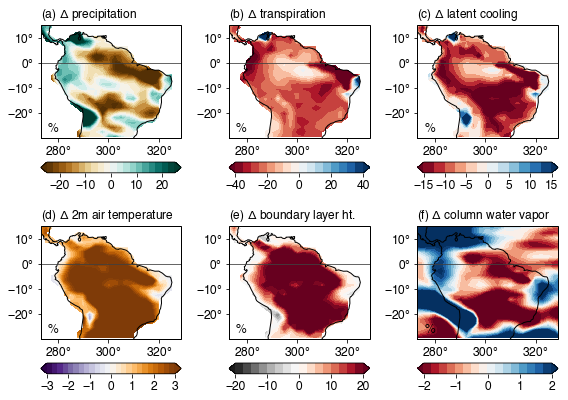

In [83]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(8,6))
fontsize = 12
lon_offset = 25.

# PRECT

perc_diff = (PRECT_diffs_timemean_landmask/PRECT_400_timemean_landmask)*100.
levels = numpy.arange(-25,26,2.5)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
contour_plot1 = ax1.contourf(lon_subset, lat_subset, perc_diff, \
                             levels=levels, \
                             cmap='BrBG', extend='both', transform=cartopy.crs.PlateCarree())

# DELTA TRANSPIRATION

perc_diff = (QVEGT_diffs_timemean/QVEGT_400_timemean)*100.
levels = numpy.arange(-40,41,5)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
contour_ploTREFHT = ax2.contourf(lon_subset, lat_subset, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# LH

perc_diff = (LHFLX_diffs_timemean_landmask/LHFLX_400_timemean_landmask)*100.
levels = numpy.arange(-15,16,2.5)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
contour_plot3 = ax3.contourf(lon_subset, lat_subset, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# TREFHT

perc_diff = (TREFHT_diffs_timemean_landmask/(TREFHT_400_timemean_landmask-273.15))*100.
levels = numpy.arange(-3,3.1,0.25)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
contour_plot4 = ax4.contourf(lon_subset, lat_subset, perc_diff, \
                             levels=levels, \
                             cmap='PuOr_r', extend='both', transform=cartopy.crs.PlateCarree())

# PBLH

perc_diff = (PBLH_diffs_timemean_landmask/PBLH_400_timemean_landmask)*100.
levels = numpy.arange(-20,21,2.5)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
contour_plot5 = ax5.contourf(lon_subset, lat_subset, perc_diff, \
                             levels=levels, \
                             cmap='RdGy_r', extend='both', transform=cartopy.crs.PlateCarree())

# TMQ

perc_diff = (TMQ_diffs_timemean/TMQ_400_timemean)*100.
levels = numpy.arange(-2,2.1,0.25)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
contour_plot6 = ax6.contourf(lon_subset, lat_subset, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout()#h_pad=7, w_pad=3)
fig.canvas.draw_idle()

title = ax1.text(s='(a) $\Delta$ precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) $\Delta$ transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) $\Delta$ latent cooling', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) $\Delta$ 2m air temperature', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) $\Delta$ boundary layer ht.', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) $\Delta$ column water vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)


cbar_thickness=0.025
cbar_yshift=-0.08

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-20,-10,0,10,20])

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_ploTREFHT, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-40,-20,0,20,40])

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(-20,21,10))

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-3,-2,-1,0,1,2,3])

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-20,-10,0,10,20])

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-2,-1,0,1,2])

#fig.savefig('CESM_FRACTIONAL_change_days_2to10.png', dpi=600, transparent=True, bbox_inches='tight')
fig.savefig('CESM_FRACTIONAL_change_days_2to30.png', dpi=600, transparent=True, bbox_inches='tight')


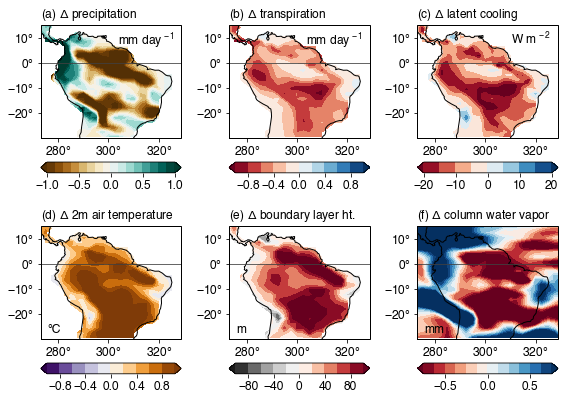

In [84]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(8,6))
fontsize = 12
lon_offset=25.

# PRECT

levels = numpy.arange(-1,1.1,0.125)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([lon_subset.min()+lon_offset, lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=cartopy.crs.PlateCarree())
contour_plot1 = ax1.contourf(lon_subset, lat_subset, PRECT_diffs_timemean_landmask*86400.*1000., \
                             levels=levels, \
                             cmap='BrBG', extend='both', transform=cartopy.crs.PlateCarree())

# DELTA TRANSPIRATION

levels = numpy.arange(-1,1.1,0.2)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
ax2.set_extent([lon_subset.min()+lon_offset, lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=cartopy.crs.PlateCarree())
contour_ploTREFHT = ax2.contourf(lon_subset, lat_subset, QVEGT_diffs_timemean*86400., levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# LH

levels = numpy.arange(-20,21,5)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
ax3.set_extent([lon_subset.min()+lon_offset, lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=cartopy.crs.PlateCarree())
contour_plot3 = ax3.contourf(lon_subset, lat_subset, LHFLX_diffs_timemean_landmask, levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# TREFHT

levels = numpy.arange(-1,1.1,0.2)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
ax4.set_extent([lon_subset.min()+lon_offset, lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=cartopy.crs.PlateCarree())
contour_plot4 = ax4.contourf(lon_subset, lat_subset, TREFHT_diffs_timemean_landmask, levels=levels, \
                             cmap='PuOr_r', extend='both', transform=cartopy.crs.PlateCarree())

# PBLH

levels = numpy.arange(-100,101,20)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
contour_plot5 = ax5.contourf(lon_subset, lat_subset, PBLH_diffs_timemean_landmask, \
                             levels=levels, \
                             cmap='RdGy_r', extend='both', transform=cartopy.crs.PlateCarree())

# TMQ

levels = numpy.arange(-.75,.76,0.125)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
contour_plot6 = ax6.contourf(lon_subset, lat_subset, TMQ_diffs_timemean, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout()
fig.canvas.draw_idle()

title = ax1.text(s='(a) $\Delta$ precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) $\Delta$ transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) $\Delta$ latent cooling', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) $\Delta$ 2m air temperature', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) $\Delta$ boundary layer ht.', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) $\Delta$ column water vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='W m$^{\,-2}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s=DEGREE_SIGN+'C', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='m', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='mm', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)

cbar_thickness=0.025
cbar_yshift=-0.08

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label='mm day$^{-1}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([numpy.arange(-1,1.1,0.5)])

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_ploTREFHT, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label='mm day$^{-1}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label='W m$^{-2}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks(numpy.arange(-20,21,10))

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-.5,0,.5])

#fig.savefig('CESM_ABSOLUTE_change_days_2to10.png', dpi=600, transparent=True, bbox_inches='tight')
fig.savefig('CESM_ABSOLUTE_change_days_2to30.png', dpi=600, transparent=True, bbox_inches='tight')



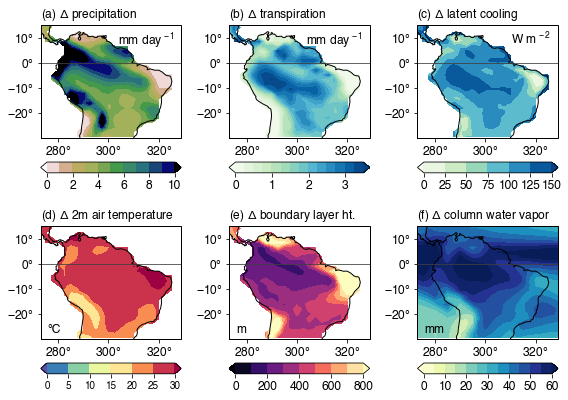

In [85]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(8,6))
fontsize = 12
lon_offset=25.

# PRECT

levels = numpy.arange(0,10.1,1.)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([lon_subset.min()+lon_offset, lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=cartopy.crs.PlateCarree())
contour_plot1 = ax1.contourf(lon_subset, lat_subset, PRECT_400_timemean_landmask*86400.*1000., \
                             levels=levels, \
                             cmap='gist_earth_r', extend='both', transform=cartopy.crs.PlateCarree())

# DELTA TRANSPIRATION

levels = numpy.arange(0,3.51,0.25)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
ax2.set_extent([lon_subset.min()+lon_offset, lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=cartopy.crs.PlateCarree())
contour_ploTREFHT = ax2.contourf(lon_subset, lat_subset, QVEGT_400_timemean*86400., levels=levels, \
                             cmap='GnBu', extend='both', transform=cartopy.crs.PlateCarree())

# LH

levels = numpy.arange(0,151,25)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
ax3.set_extent([lon_subset.min()+lon_offset, lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=cartopy.crs.PlateCarree())
contour_plot3 = ax3.contourf(lon_subset, lat_subset, LHFLX_400_timemean_landmask, levels=levels, \
                             cmap='GnBu', extend='both', transform=cartopy.crs.PlateCarree())

# TREFHT

levels = numpy.arange(0,31,5)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
ax4.set_extent([lon_subset.min()+lon_offset, lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=cartopy.crs.PlateCarree())
contour_plot4 = ax4.contourf(lon_subset, lat_subset, TREFHT_400_timemean_landmask-273.15, levels=levels, \
                             cmap='Spectral_r', extend='both', transform=cartopy.crs.PlateCarree())

# PBLH

levels = numpy.arange(0,801,100)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
contour_plot5 = ax5.contourf(lon_subset, lat_subset, PBLH_400_timemean_landmask, \
                             levels=levels, \
                             cmap='magma', extend='both', transform=cartopy.crs.PlateCarree())

# TMQ

levels = numpy.arange(0,61,5)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
contour_plot6 = ax6.contourf(lon_subset, lat_subset, TMQ_400_timemean, \
                             levels=levels, \
                             cmap='YlGnBu', extend='both', transform=cartopy.crs.PlateCarree())

ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout()
fig.canvas.draw_idle()

title = ax1.text(s='(a) $\Delta$ precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) $\Delta$ transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) $\Delta$ latent cooling', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) $\Delta$ 2m air temperature', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) $\Delta$ boundary layer ht.', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) $\Delta$ column water vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='W m$^{\,-2}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s=DEGREE_SIGN+'C', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='m', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='mm', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)

cbar_thickness=0.025
cbar_yshift=-0.08

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks([numpy.arange(-1,1.1,0.5)])

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_ploTREFHT, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([0,1,2,3])

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(-20,21,10))

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
#cbar_axes.tick_params(labelsize=fontsize)

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([0,200,400,600,800])

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks([-.5,0,.5])

#fig.savefig('CESM_clim_days_2to10.png', dpi=600, transparent=True, bbox_inches='tight')
fig.savefig('CESM_clim_days_2to30.png', dpi=600, transparent=True, bbox_inches='tight')